In [4]:
import qrm_state

ps_list, err_list, err_var = qrm_state.experiment(
    N=100,
    p=1e-3,
    type='T',
)

print(ps_list, err_list)

0.003651363027360296 2.09153088293057e-09


In [5]:
import numpy as np

err_rates = np.linspace(1e-3, 1e-2, 10)

ps_list_T, ps_list_S = [], []
err_list_T, err_list_S = [], []
err_var_list_T, err_var_list_S = [], []

for err in err_rates:
    ps_T, err_T, err_var_T = qrm_state.experiment(
        N=1000,
        p=err,
        type='T'
    )
    ps_S, err_S, err_var_S = qrm_state.experiment(
        N=1000,
        p=err,
        type='S'
    )
    
    ps_list_T.append(ps_T)
    err_list_T.append(err_T)
    ps_list_S.append(ps_S)
    err_list_S.append(err_S)
    err_var_list_T.append(err_var_T)
    err_var_list_S.append(err_var_S)

    print(f"Error rate: {err:.4e} | T-gate: ps={ps_T:.4e}, err={err_T:.4e} | S-gate: ps={ps_S:.4e}, err={err_S:.4e}")

Error rate: 1.0000e-03 | T-gate: ps=3.7659e-03, err=2.1416e-09 | S-gate: ps=7.4633e-03, err=1.7235e-08
Error rate: 2.0000e-03 | T-gate: ps=7.4855e-03, err=1.7714e-08 | S-gate: ps=1.4719e-02, err=1.3781e-07
Error rate: 3.0000e-03 | T-gate: ps=1.1231e-02, err=6.1002e-08 | S-gate: ps=2.1736e-02, err=4.4135e-07
Error rate: 4.0000e-03 | T-gate: ps=1.5110e-02, err=1.4607e-07 | S-gate: ps=2.9566e-02, err=1.0979e-06
Error rate: 5.0000e-03 | T-gate: ps=1.8385e-02, err=2.6867e-07 | S-gate: ps=3.6947e-02, err=2.3725e-06
Error rate: 6.0000e-03 | T-gate: ps=2.2172e-02, err=4.8086e-07 | S-gate: ps=4.3547e-02, err=3.7619e-06
Error rate: 7.0000e-03 | T-gate: ps=2.6084e-02, err=7.8190e-07 | S-gate: ps=5.0262e-02, err=5.9470e-06
Error rate: 8.0000e-03 | T-gate: ps=3.0146e-02, err=1.1953e-06 | S-gate: ps=5.7774e-02, err=9.1263e-06
Error rate: 9.0000e-03 | T-gate: ps=3.3223e-02, err=1.7183e-06 | S-gate: ps=6.7236e-02, err=1.4915e-05
Error rate: 1.0000e-02 | T-gate: ps=3.7232e-02, err=2.2974e-06 | S-gate: 

In [3]:
# 定义 Wilson Score Interval 计算函数
def get_wilson_interval(k, n, z=1.96): 
    # z=1.96 对应 95% 置信度
    if n == 0: return 0.0, 0.0, 0.0
    
    p_hat = k / n
    
    # Wilson Score Interval 公式
    denominator = 1 + z**2 / n
    center_adjusted = (p_hat + z**2 / (2 * n)) / denominator
    spread = z * np.sqrt(p_hat * (1 - p_hat) / n + z**2 / (4 * n**2)) / denominator
    
    # 算出的下限和上限
    lower = center_adjusted - spread
    upper = center_adjusted + spread
    
    # 修正边界：不能小于0，不能大于1
    lower = max(0.0, lower)
    upper = min(1.0, upper)
    
    return p_hat, lower, upper

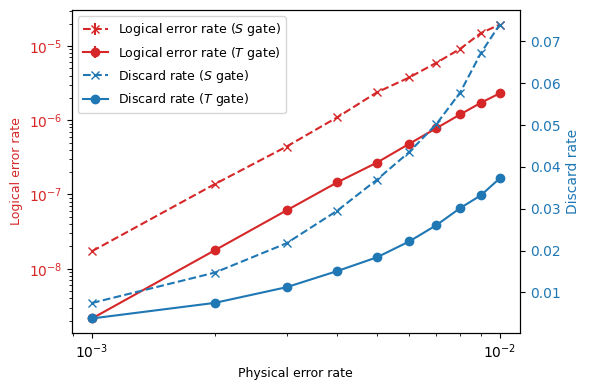

In [17]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(6, 4))

fontsize = 9

# Plotting error rates on the left y-axis
color = 'tab:red'
ax1.set_xlabel('Physical error rate', fontsize=fontsize)
ax1.set_ylabel('Logical error rate', color=color, fontsize=fontsize)
line1 = ax1.errorbar(err_rates, err_list_S, yerr=err_var_list_S, fmt='x--', color=color, label=r'Logical error rate ($S$ gate)')
line2 = ax1.errorbar(err_rates, err_list_T, yerr=err_var_list_T, fmt='o-', color=color, label=r'Logical error rate ($T$ gate)')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xscale('log')
ax1.set_yscale('log')

# Creating a second y-axis for success probabilities
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Discard rate', color=color)
line3, = ax2.plot(err_rates, ps_list_S, 'x--', color=color, label=r'Discard rate ($S$ gate)')
line4, = ax2.plot(err_rates, ps_list_T, 'o-', color=color, label=r'Discard rate ($T$ gate)')
ax2.tick_params(axis='y', labelcolor=color)
# ax2.set_yscale('log')

# Adding a combined legend
lines = [line1, line2, line3, line4]
ax1.legend(lines, [l.get_label() for l in lines], loc='upper left', fontsize=fontsize)

# plt.title('Logical Performance vs. Physical Error Rate')

plt.tight_layout()
plt.savefig('TS.pdf', 
           bbox_inches='tight',  # 紧贴内容边界
           pad_inches=0) 